## Importing libraries and modules

The next cell below shows the modules and libraries imported for the project.

In [1]:
from sklearn.datasets import load_breast_cancer       #importing the breast cancer dataset
from sklearn.model_selection import train_test_split  #for splitting the dataset to train and test 

from sklearn.linear_model import LogisticRegression   #used for the logistic regression
from sklearn.ensemble import RandomForestClassifier   #used for random forest technique (classification)
from sklearn.svm import SVC                           #used for support vector machine (SVM)

import pandas as pd                                   #convert the type of the dataset to dataframe
import seaborn as sns                                 #for plotting purposes
from sklearn.metrics import confusion_matrix          #confusion matrix for showing the predictions of the model

cancer = load_breast_cancer()                         #naming the dataset as cancer

## Looking into the dataset
Here, we will first look into the dataset to see if there are any missing values or error. Cleaning the dataset first before doing machine learning or any data science stuff will help the machine understand the data better.

Here, I converted the breast cancer dataset into dataframe first. This is to see a more understandable perspective (at least for me) about the data

In [2]:
cancer_pd = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_pd['Target'] = cancer.target
cancer_pd

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


For comparison, this is what it looks like if we are seeing the dataset from sklearn:

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Next, we look at the descriptive statistics of the data for an overview

In [4]:
cancer_pd.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Notice the row 'count'. They are all equal to 569, which means that there are no missing values in the dataset. Also, notice that all columns in the dataset are numerical. This means that we don't have to convert any categorical features to numerical values anymore.

We can now proceed to our machine learning algorithm.

## Splitting the dataset
In this part, we will now split the dataset into train data and test data which will be used for training and prediction. We will use the split dataset in all machine learning algorithms later.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

## Logistic Regression

We will now train our model using logistic regression and see how accurate our model will be.

In [6]:
logreg = LogisticRegression().fit(X_train, y_train) #using logistic regression

#let us now look at the results of the model
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.965


C:\Users\jonna\Anaconda3\envs\artemis\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### Testing the model
Now, let us try the model by looking at the confusion matrix of the test dataset

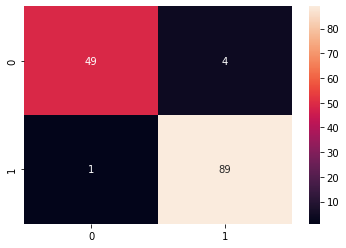

In [7]:
y_pred_logreg = logreg.predict(X_test) #the performance of the model on the test dataset

sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True);

From the confusion matrix above, we see that there are 90 breast cancer patients and 53 non-breast cancer patients in the y_test dataset. From the non-breast cancer patients, 4 was predicted to have a breast cancer. This is called the false positive error. On the other hand, the algorithm predicted a breast cancer patient to have no breast cancer. This is the false negative error.

Now, look at this way:
If a patient is false positive, or they were predicted to have breast cancer when they do not have it at all, then they might be given unnecessary treatments. They will also have to undergo second test if they want to make it sure.

If a patient is false negative, or the algorithm predicted that they have no breast cancer when they are in fact a patient, then it might lead to a serious problem since the disease is ignored.

# Random Forest Classifier

Next, we will use the random forest classifier algorithm in or dataset.

In [8]:
forest = RandomForestClassifier(n_estimators=100, random_state=0) #using random forest classifier
forest.fit(X_train, y_train)

print("Training set score: {:.3f}".format(forest.score(X_train, y_train)))
print("Test set score: {:.3f}".format(forest.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.958


#### Testing the Model

Now, let us test the model using random forest classifier

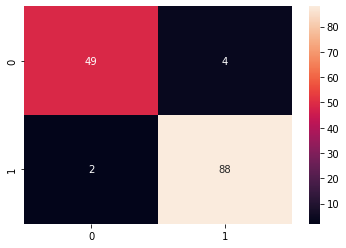

In [9]:
y_pred_rf = forest.predict(X_test) #evaluating the performance of the model on the test dataset

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True);

Using random forest classifier, the algorithm has scored 95.8% accuracy in the test. Looking at the confusion matrix, the algorithm has resulted to 4 false positives and 2 false negatives.

## Support Vector Machine

Next, we will use the support vector machine algorithm to our dataset

In [10]:
svc = SVC()
svc.fit(X_train, y_train) #using support vector machine

print("Training set score: {:.3f}".format(svc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svc.score(X_test, y_test)))

Training set score: 0.918
Test set score: 0.923


#### Testing the Model

Now, let us test the model using the support vector machine

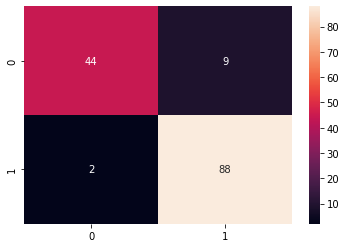

In [11]:
y_pred_svc = svc.predict(X_test) #determining the performance of the model on the test dataset

sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True);

From the confusion matrix above, it can be seen that the model resulted to 9 false negatives and 2 false positives. The accuracy of the model, as based on the test dataset, is 92.3%, which means that the model accurately predicts if the patient has breast cancer or no breast cancer, 92.3% of the time.

## Discussion and Summary of Results

The Breast Cancer dataset from scikit-learn was used in the following machine learning algorithms: 1) Logistic Regression, 2) Random Forest Classifer, and 3) Support Vector Machine

From the machine learning used above, here are the results based from their performance on the randomized test dataset:
1. Logistic Regression - 96.5%
2. Random Forest Classifier - 95.8%
3. Support Vector Machine - 92.3%

The Logistic Regression algorithm shows the highest accuracy among the three. Moreover, since the three algorithms have produced high accuracies, it can now be used as a support in making decisions especially in the medical field. It is recommended however to test more algorithms that will allow higher accuracy and will lead to less error.

#### Summary of the Confusion Matrices

We have used confusion matrices to learn how the three algorithms work on the test dataset. Specifically, we have tried to identify the false positive errors and false negative errors of the algorithms.

In the medical world, false positive errors will result to unnecessary treatments. But if the result is false negative, then it might cause serious problems since the health problem itself is ignored.

Of the two types of errors, it is probably safe to say that false negative results are the more serious problems, right (ie. it is better to have a false alarm than not diagnosing the diease at all)?

From the results above, the logistic regression has 1/90 false negatives, and the random forest classifier and support vector machine both have 2/90 false negatives. What does this mean?

This simply means that the algorithms are still at least 97.8% false negative-proof. Thus, we can say that the algorithms clearly are more accurate in terms of detecting the breast cancer patients, which are far more dangerous than making a false alarm. 

### Recommendation

The algorithms tested and used in this project shows very high accuracy for detecting breast cancer patients if we have sufficient data. But though we are taking advantage of technology in detecting diseases, it is still highly recommended that this will only be used as a supporting factor for the doctor's decision. This should not be used alone to tell whether the patient has a breast cancer or not. After all, it is still the doctor, who spent many years studying and practicing medicine, that can give the best treatment and diagnosis to the patient.